In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [12]:
data = pd.read_csv("files_for_lab/csv_files/marketing_customer_analysis.csv")

In [11]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
numerical = data._get_numeric_data()
numerical.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [26]:
categorical = data.select_dtypes(include='object')
categorical.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

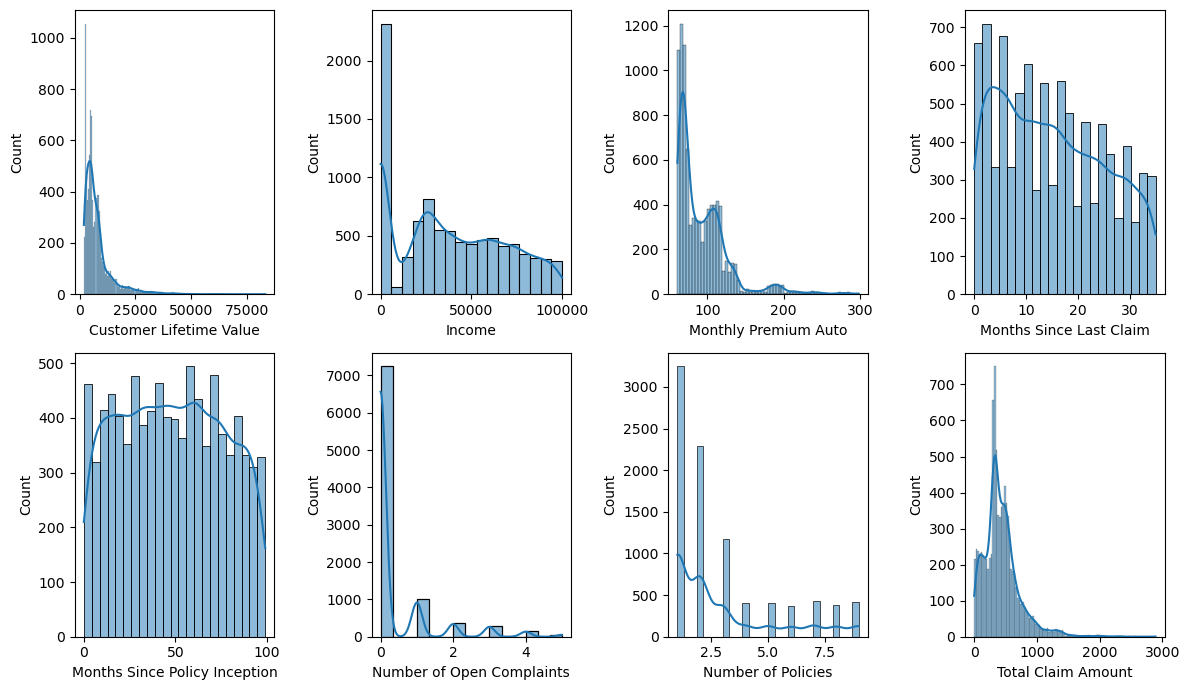

In [10]:
fig, axis = plt.subplots(2,4, figsize=(12,7))

sns.histplot(data['Customer Lifetime Value'].values, kde=True, ax = axis[0,0]).set_xlabel('Customer Lifetime Value')

sns.histplot(data['Income'].values, kde=True, ax = axis[0,1]).set_xlabel('Income')

sns.histplot(data['Monthly Premium Auto'].values, kde=True, ax = axis[0,2]).set_xlabel('Monthly Premium Auto')

sns.histplot(data['Months Since Last Claim'].values, kde=True, ax = axis[0,3]).set_xlabel('Months Since Last Claim')

sns.histplot(data['Months Since Policy Inception'].values, kde=True, ax = axis[1,0]).set_xlabel('Months Since Policy Inception')

sns.histplot(data['Number of Open Complaints'].values, kde=True, ax = axis[1,1]).set_xlabel('Number of Open Complaints')

sns.histplot(data['Number of Policies'].values, kde=True, ax = axis[1,2]).set_xlabel('Number of Policies')

sns.histplot(data['Total Claim Amount'].values, kde=True, ax = axis[1,3]).set_xlabel('Total Claim Amount')

plt.tight_layout()

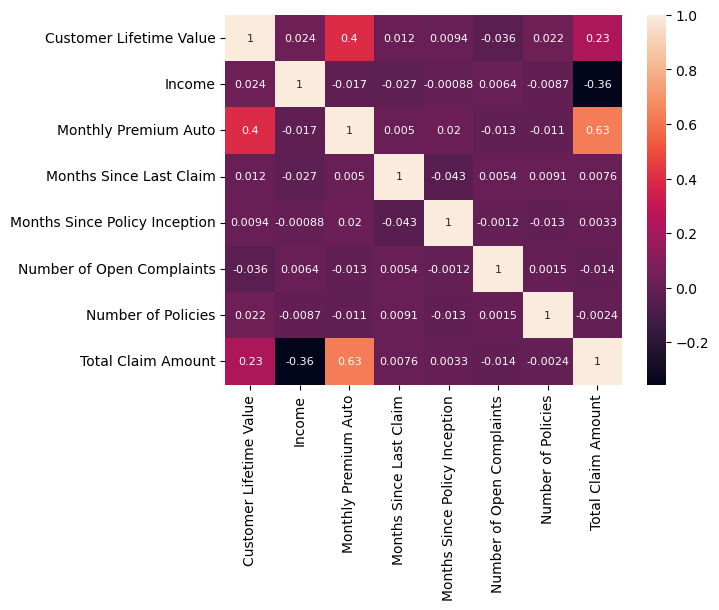

In [18]:
sns.heatmap(data.corr(),annot=True, annot_kws={"fontsize":8})
plt.show()

In [14]:
corr_matrix = data.corr()

In [15]:
corr_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000
